# Newton's Method

함수 $f(x)$가 해 $x*$ 근처에서 연속이고 미분가능할 때
- $x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}, \, f'(x_n) \ne 0$
- $|x_{n+1}-x_{n}| \le \text{tol}$일 때까지 반복, `tol`은 임의의 작은 수

## 장단점
- Bisection Method보다 빠르다.
- 과정 중 $f'(x_n)=0$이 되는 지점이 나오면 탐색이 불가능해짐
- 연속이고 미분 가능하다는 조건이 반드시 필요함
- 초기 기울기가 0에 가까울 때 해로부터 멀리 떨어지게 됨

# 코드 구현

In [29]:
def derivative(func, x):
    delta_x = 1e-4
    fx_plus_delta = func(x + delta_x)
    fx_minus_delta = func(x - delta_x)
    
    return (fx_plus_delta - fx_minus_delta) / (2 * delta_x)

class newton:
    
    def __init__(self, xn, func, tol=1e-6):
        self.xn = xn
        self.func = func
        self.tol = tol
        
    def solve(self):
        history = [self.xn]
        
        while True:
            f_prime_xn = derivative(self.func, self.xn)
            
            # 미분값이 0에 매우 가까운 경우, xn에 noise를 더하여 빠져나오기
            if abs(f_prime_xn) <= 1e-1:
                self.xn += self.tol
                continue
                
            xn1 = self.xn - self.func(self.xn) / f_prime_xn
            
            # xn+1과 xn 차이가 tol 이하인 경우
            if abs(xn1 - self.xn) <= self.tol:
                self.solution = xn1
                self.history = history
                return xn1
            
            self.xn = xn1
            history.append(xn1)

In [30]:
import math

def f(x):
    return math.sin(math.cos(math.exp(x)))

In [31]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.arange(-2, 2+0.01, 0.01)
ys = np.array([f(x) for x in xs])

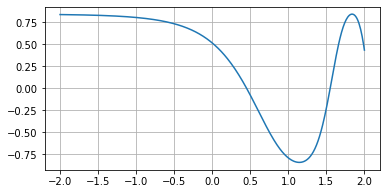

In [32]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.grid()
plt.show()

In [33]:
NM = newton(func=f, xn = 0.2)

In [34]:
NM.solve()

0.45158270528986616

In [35]:
NM.history

[0.2, 0.5105232735453394, 0.4529377649282177, 0.4515836188636482]

In [40]:
def g(x):
    return (x+1) * x * (x-1)

In [43]:
xs = np.arange(-1.5, 1.5+0.01, 0.01)
ys = np.array([g(x) for x in xs])

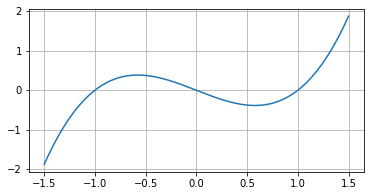

In [44]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.grid()
plt.show()

In [46]:
derivative(g, 1/math.sqrt(3))

1.0000056338554941e-08

In [47]:
NM = newton(func=g, xn = 1/math.sqrt(3))

In [48]:
NM.solve()

1.0

In [49]:
NM.history

[0.5773502691896258,
 4.440525829690732,
 3.0112552095349914,
 2.084117047377578,
 1.504900843504723,
 1.1764180965155475,
 1.0331077084659435,
 1.0015263584322245,
 1.0000034822610688,
 1.0000000000182065]

In [55]:
len(NM.history)

10

## 노이즈를 추가해주지 않는 경우

In [50]:
class newton2:
    
    def __init__(self, xn, func, tol=1e-6):
        self.xn = xn
        self.func = func
        self.tol = tol
        
    def solve(self):
        history = [self.xn]
        
        while True:
            f_prime_xn = derivative(self.func, self.xn)
                
            xn1 = self.xn - self.func(self.xn) / f_prime_xn
            
            # xn+1과 xn 차이가 tol 이하인 경우
            if abs(xn1 - self.xn) <= self.tol:
                self.history = history
                return xn1
            
            self.xn = xn1
            history.append(xn1)

In [51]:
NM2 = newton2(func=g, xn = 1/math.sqrt(3))

In [52]:
NM2.solve()

1.0000000000000002

In [54]:
NM2.history

[0.5773502691896258,
 38489801.67734792,
 25659913.53432971,
 17106805.772778533,
 11404620.424161963,
 7603080.283382256,
 5068713.803968893,
 3379140.7402197667,
 2252758.2487681042,
 1501837.3734497202,
 1001225.4417386721,
 667483.446320174,
 444988.8221654964,
 296659.2258749766,
 197772.82890300144,
 131848.55509987928,
 87899.04141642194,
 58599.36243870078,
 39066.241233936846,
 26044.160555785922,
 17362.773822068186,
 11575.182628148897,
 7716.788419140896,
 5144.525648964161,
 3429.683814422639,
 2286.455942772339,
 1524.3040606057189,
 1016.2028526771003,
 677.4687870785663,
 451.64618602569965,
 301.0979493165166,
 200.73270423096778,
 133.82290988846742,
 89.21693385905775,
 59.4804468194225,
 39.65736762059299,
 26.443849823327028,
 17.63764077360295,
 11.771040014022308,
 7.866284260850957,
 5.272592472322726,
 3.55771980421531,
 2.4359646178779437,
 1.7206314867173158,
 1.2926254253167788,
 1.076509138038653,
 1.0074523713609698,
 1.0000818831905487,
 1.000000010055773

In [56]:
len(NM2.history)

49